# HW-3
## Name - Mahek Saluja
## USC ID - 8231303227

## 1.b) Reading file and segregated for test and train files

In [284]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFECV
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import cross_val_score, GridSearchCV
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

Root_Data_Dir = '../data/AReM'
Col = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
all_file_path = []
for root, dirs, files in os.walk(Root_Data_Dir):
    for file in files:
        if not file.startswith('.'):
            all_file_path.append(os.path.join(root, file))
all_file_path.sort()
dir_list = os.listdir(Root_Data_Dir)
dir_list.sort()
test_files = []
path = Root_Data_Dir + '/'
for i, dir in enumerate(dir_list):
    if not dir.startswith('.'):
        test_files.append(Root_Data_Dir + '/' + dir + '/dataset1.csv')
        test_files.append(Root_Data_Dir + '/' + dir + '/dataset2.csv')
        if dir != 'bending1' and dir != 'bending2':
            test_files.append(Root_Data_Dir + '/' + dir + '/dataset3.csv')

train_files = list(set(all_file_path) - set(test_files))
train_files.sort()

In [285]:
# train_dataframe = pd.DataFrame()

# for path in train_files:
#     f = pd.read_csv(path, delimiter=',', skiprows = 5, names=Col)
#     train_dataframe = train_dataframe.append(f)
# train_dataframe


In [286]:
# test_dataframe = pd.DataFrame()

# for path in test_files:
#     f = pd.read_csv(path, delimiter=',', skiprows = 5, names=Col)
#     test_dataframe = test_dataframe.append(f)
# test_dataframe

# c.i) 
## The time doain features generally used are min, max, mean, median, standard deviation, first-quartile, third-quartile

# c.ii) Extracting time domain feature 

In [287]:
# feature_dataframe = pd.DataFrame()

feature_data = []
for i, path in enumerate(all_file_path):
    temp = path.split('/')
    label = temp[-2] + "/" + temp[-1]
    f =pd.read_csv(path, delimiter=',', skiprows = 5, names=Col)
    data = []
    for j, col in enumerate(f.columns):
        temp = [f[col].min(), f[col].max(), f[col].mean(), f[col].median(), f[col].std(), f[col].quantile(.25), f[col].quantile(.75)]
        data.extend(temp)
    feature_data.append(data)
feature_dataframe = pd.DataFrame(feature_data)
feature_dataframe.columns = ['min(1)', 'max(1)', 'mean(1)', 'median(1)', 'std(1)', 'firstquartile(1)', 'thirdquartie(1)',
                            'min(2)', 'max(2)', 'mean(2)', 'median(2)', 'std(2)', 'firstquartile(2)', 'thirdquartie(2)',
                            'min(3)', 'max(3)', 'mean(3)', 'median(3)', 'std(3)', 'firstquartile(3)', 'thirdquartie(3)',
                            'min(4)', 'max(4)', 'mean(4)', 'median(4)', 'std(4)', 'firstquartile(4)', 'thirdquartie(4)',
                            'min(5)', 'max(5)', 'mean(5)', 'median(5)', 'std(5)', 'firstquartile(5)', 'thirdquartie(5)',
                            'min(6)', 'max(6)', 'mean(6)', 'median(6)', 'std(6)', 'firstquartile(6)', 'thirdquartie(6)']
feature_dataframe

,min(1),max(1),mean(1),median(1),std(1),firstquartile(1),thirdquartie(1),min(2),max(2),mean(2),...,std(5),firstquartile(5),thirdquartie(5),min(6),max(6),mean(6),median(6),std(6),firstquartile(6),thirdquartie(6)
0,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
3,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
84,21.50,51.00,34.935813,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
85,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200
86,18.33,45.75,34.599875,35.125,4.731790,31.50,38.0000,0.0,15.37,4.398833,...,2.905688,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.12,4.2600


# c.iii) Estimated standard deviation and 90% bootstrap confidence interval

In [288]:
CI = {}
for col in feature_dataframe.columns:
    if col == 'label':
        continue
    CI_Range = []
    for i  in range(1000):
        sample = feature_dataframe[col].sample(n =88, replace = True)
        CI_Range.append(sample.std())
    CI_Range.sort()
    lower_value = np.percentile(CI_Range, 5)
    upper_value = np.percentile(CI_Range, 95)
    CI[col] = {'lower value':lower_value, 'upper value': upper_value,'Exact Std': feature_dataframe[col].std() }
    

pd.DataFrame(CI).T


    

,lower value,upper value,Exact Std
min(1),8.217681,10.824454,9.569975
max(1),3.416483,5.315644,4.394362
mean(1),4.712883,5.868751,5.335718
median(1),4.763637,6.020880,5.440054
std(1),1.558045,1.957369,1.772153
firstquartile(1),5.567214,6.658285,6.153590
thirdquartie(1),4.389646,5.829463,5.138925
min(2),0.000000,0.000000,0.000000
max(2),4.604541,5.392727,5.062729
mean(2),1.385157,1.707517,1.574164


# c.iv) Three time-domain feature I choose: Standard Deviation, Max, Mean

# d.i) Classify Bending vs other, scatter plot for 1, 2, 6 instance

In [289]:
cols = ['std(1)', 'max(1)', 'mean(1)', 'std(2)', 'max(2)', 'mean(2)', 'std(6)', 'max(6)', 'mean(6)', 'label']
time_series_list = [1,2,6]
feature_data = []
for i, path in enumerate(train_files):
    temp = path.split('/')
    l = 0
    if 'bending' in temp[-2]:
        l=1
    label = temp[-2] + "/" + temp[-1]
    f =pd.read_csv(path, delimiter=',', skiprows = 5, names=Col)
    data = []
    for j, col in enumerate(f.columns):
        if j+1 in time_series_list:
            temp = [f[col].std(), f[col].max(), f[col].mean()]
            data.extend(temp)
    data.extend([int(l)])
    feature_data.append(data)
feature_dataframe = pd.DataFrame(feature_data)
feature_dataframe.columns = cols
feature_dataframe

,std(1),max(1),mean(1),std(2),max(2),mean(2),std(6),max(6),mean(6),label
0,1.558835,47.40,43.954500,0.338690,1.70,0.426250,0.513506,1.79,0.493292,1
1,3.670666,47.75,42.179813,0.630860,3.00,0.696042,0.524317,2.18,0.613521,1
2,2.243490,45.75,41.678063,0.405469,2.83,0.535979,0.389164,1.79,0.383292,1
3,1.386098,48.00,43.454958,0.315566,1.58,0.378083,0.622534,5.26,0.679646,1
4,1.618364,48.00,43.969125,0.263111,1.50,0.413125,0.487826,2.96,0.555313,1
...,...,...,...,...,...,...,...,...,...,...
64,4.742208,46.25,34.763333,2.278004,12.68,4.223792,1.647528,9.39,3.288271,0
65,4.645944,51.00,34.935813,2.335243,12.21,4.115750,1.700918,10.21,3.280021,0
66,4.948770,47.67,34.333042,2.568680,12.48,4.396958,1.617290,8.01,3.261583,0
67,4.731790,45.75,34.599875,2.538521,15.37,4.398833,1.680170,8.86,3.289542,0


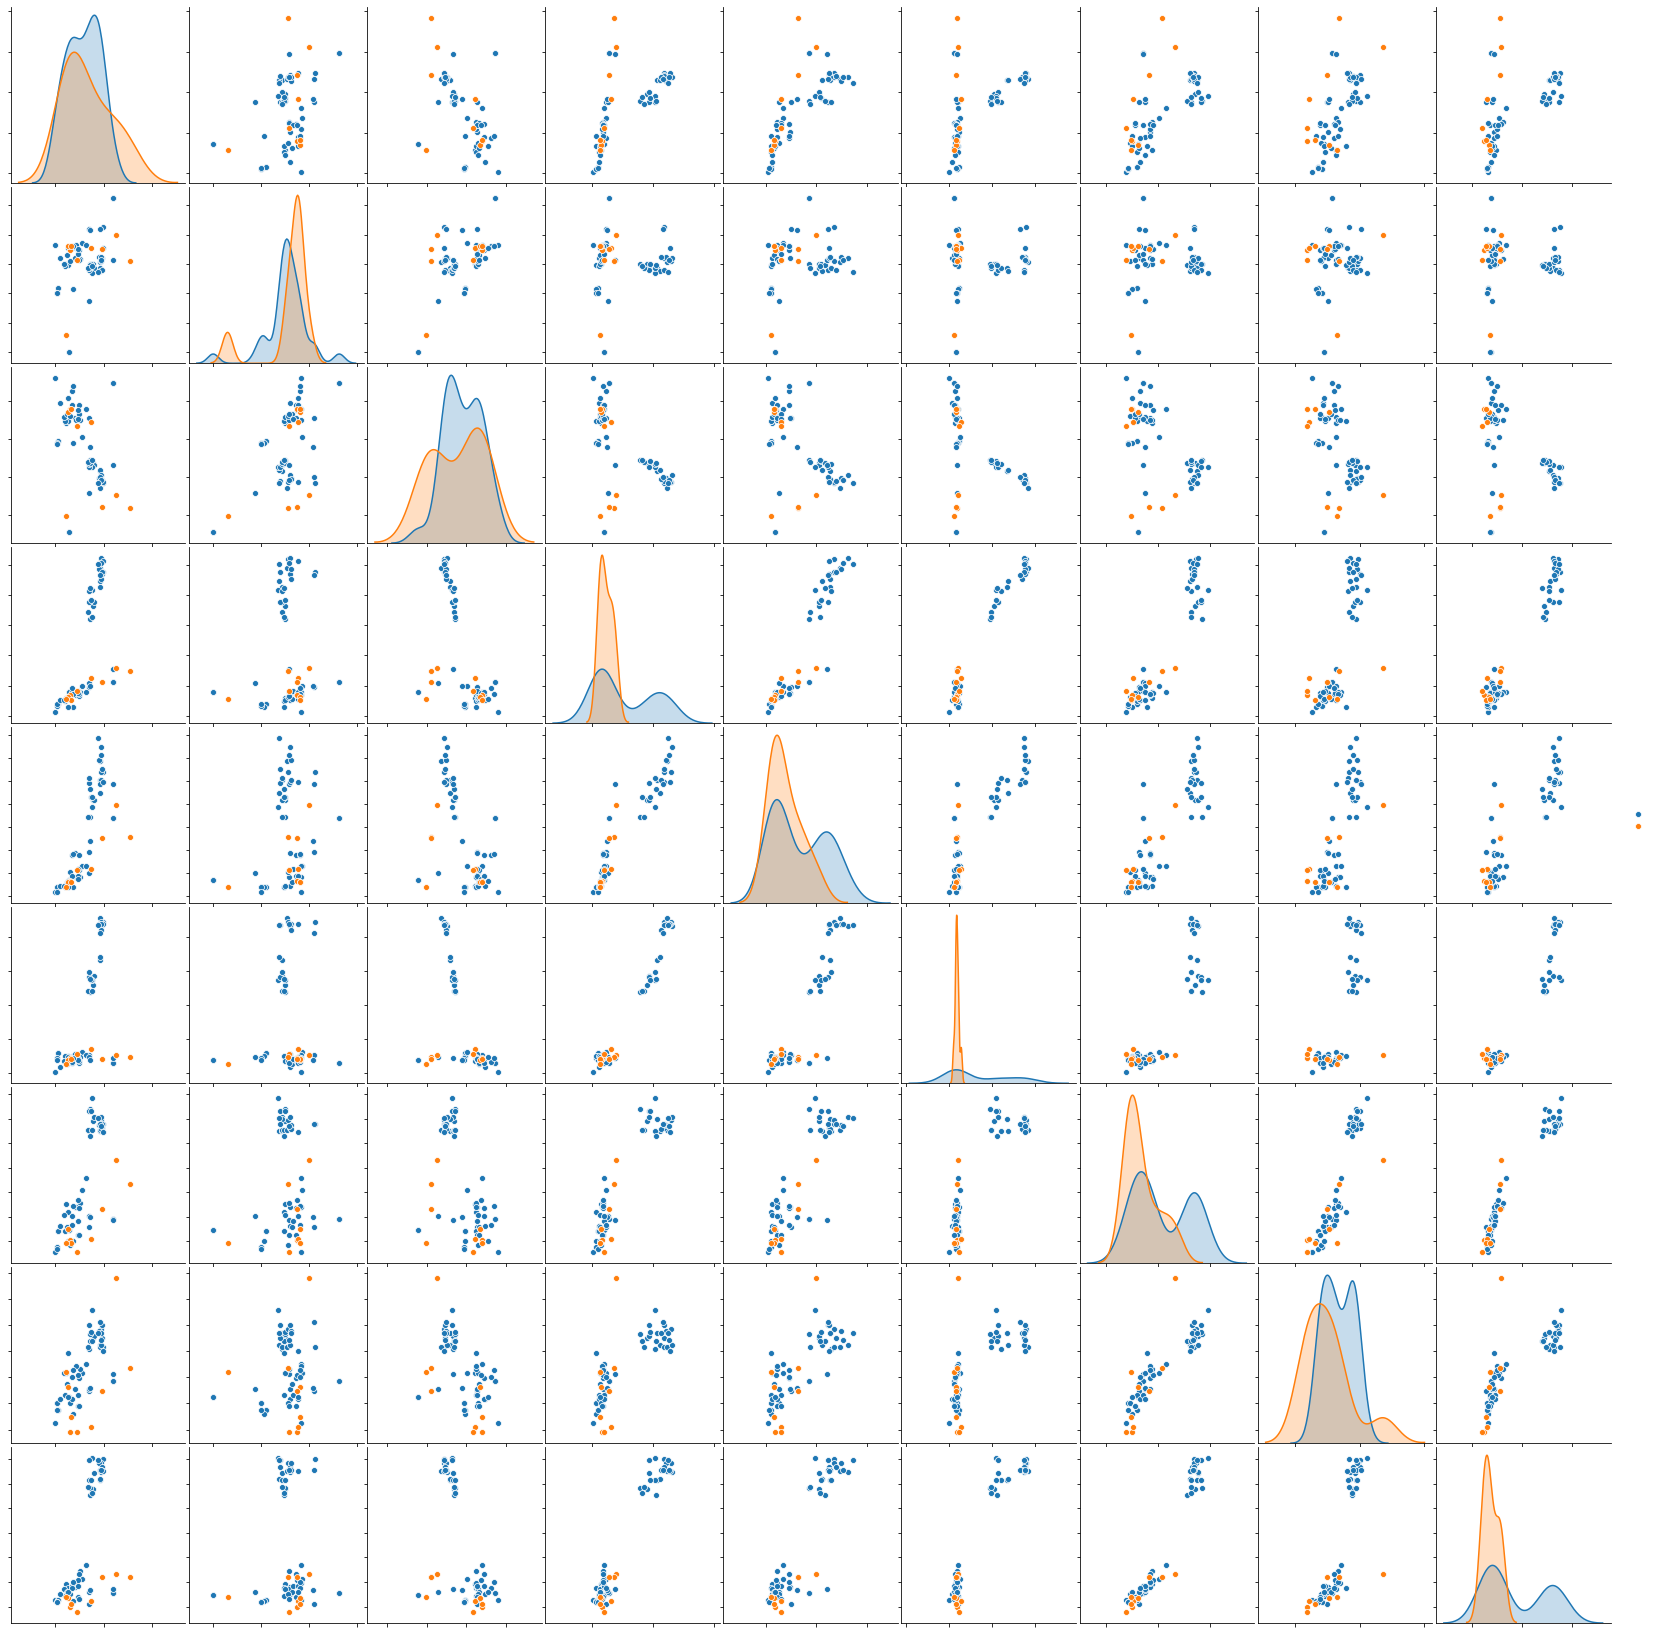

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.scatter(feature_dataframe[:9], feature_dataframe['label'])
sns.pairplot(feature_dataframe, kind='scatter', hue = 'label')

# d.ii) Break time series in half and scatter plot for 1, 2, 12 instance

In [293]:
cols = ['std(1)', 'max(1)', 'mean(1)', 'std(2)', 'max(2)', 'mean(2)', 'std(12)', 'max(12)', 'mean(12)', 'label']
time_series_list = [1,2,12]
feature_data = []
for i, path in enumerate(train_files):
    
    temp = path.split('/')
    l = 0
    if 'bending' in temp[-2]:
        l=1
    
    
    label = temp[-2] + "/" + temp[-1]
    
    f =pd.read_csv(path, delimiter=',', skiprows = 5, names=Col)
    np_arr = f.to_numpy()
    half = len(f)/2
    split_temp = [np_arr[round(half * i): round(half *(i+1))] for i in range(2)]
    new_f = pd.concat([pd.DataFrame(split_temp[0]), pd.DataFrame(split_temp[0])], sort=False, axis = 1)
    new_f.columns = [str(col) + "_" + str(i)  for i in range(1,3) for col in Col]
    
    
    data = []
    for j, col in enumerate(new_f.columns):
        if j+1 in time_series_list:
            temp_d = [new_f[col].std(), new_f[col].max(), new_f[col].mean()]
            data.extend(temp_d)
    data.extend([int(l)])
    feature_data.append(data)
feature_dataframe = pd.DataFrame(feature_data)
feature_dataframe.columns = cols
feature_dataframe
    

,std(1),max(1),mean(1),std(2),max(2),mean(2),std(12),max(12),mean(12),label
0,1.556971,46.50,44.057167,0.329540,1.50,0.381042,0.526656,1.79,0.598250,1
1,3.473355,47.75,43.278875,0.634285,3.00,0.673292,0.554542,1.53,0.640958,1
2,3.118644,45.75,41.621208,0.489595,2.83,0.623083,0.411200,1.79,0.419083,1
3,1.359836,48.00,44.117042,0.314099,1.30,0.250042,0.718016,5.26,0.815417,1
4,1.281976,45.00,43.486208,0.284434,1.30,0.378667,0.486847,2.28,0.524875,1
...,...,...,...,...,...,...,...,...,...,...
64,4.733014,46.00,34.966250,2.331940,12.68,4.207958,1.638218,8.83,3.146333,0
65,4.276717,45.67,34.737042,2.337759,12.21,4.217333,1.737573,9.19,3.334125,0
66,5.143776,45.00,33.886458,2.453111,12.44,4.332208,1.565557,7.89,3.248417,0
67,4.869092,44.00,34.836458,2.512633,12.38,4.257750,1.647640,8.86,3.169625,0


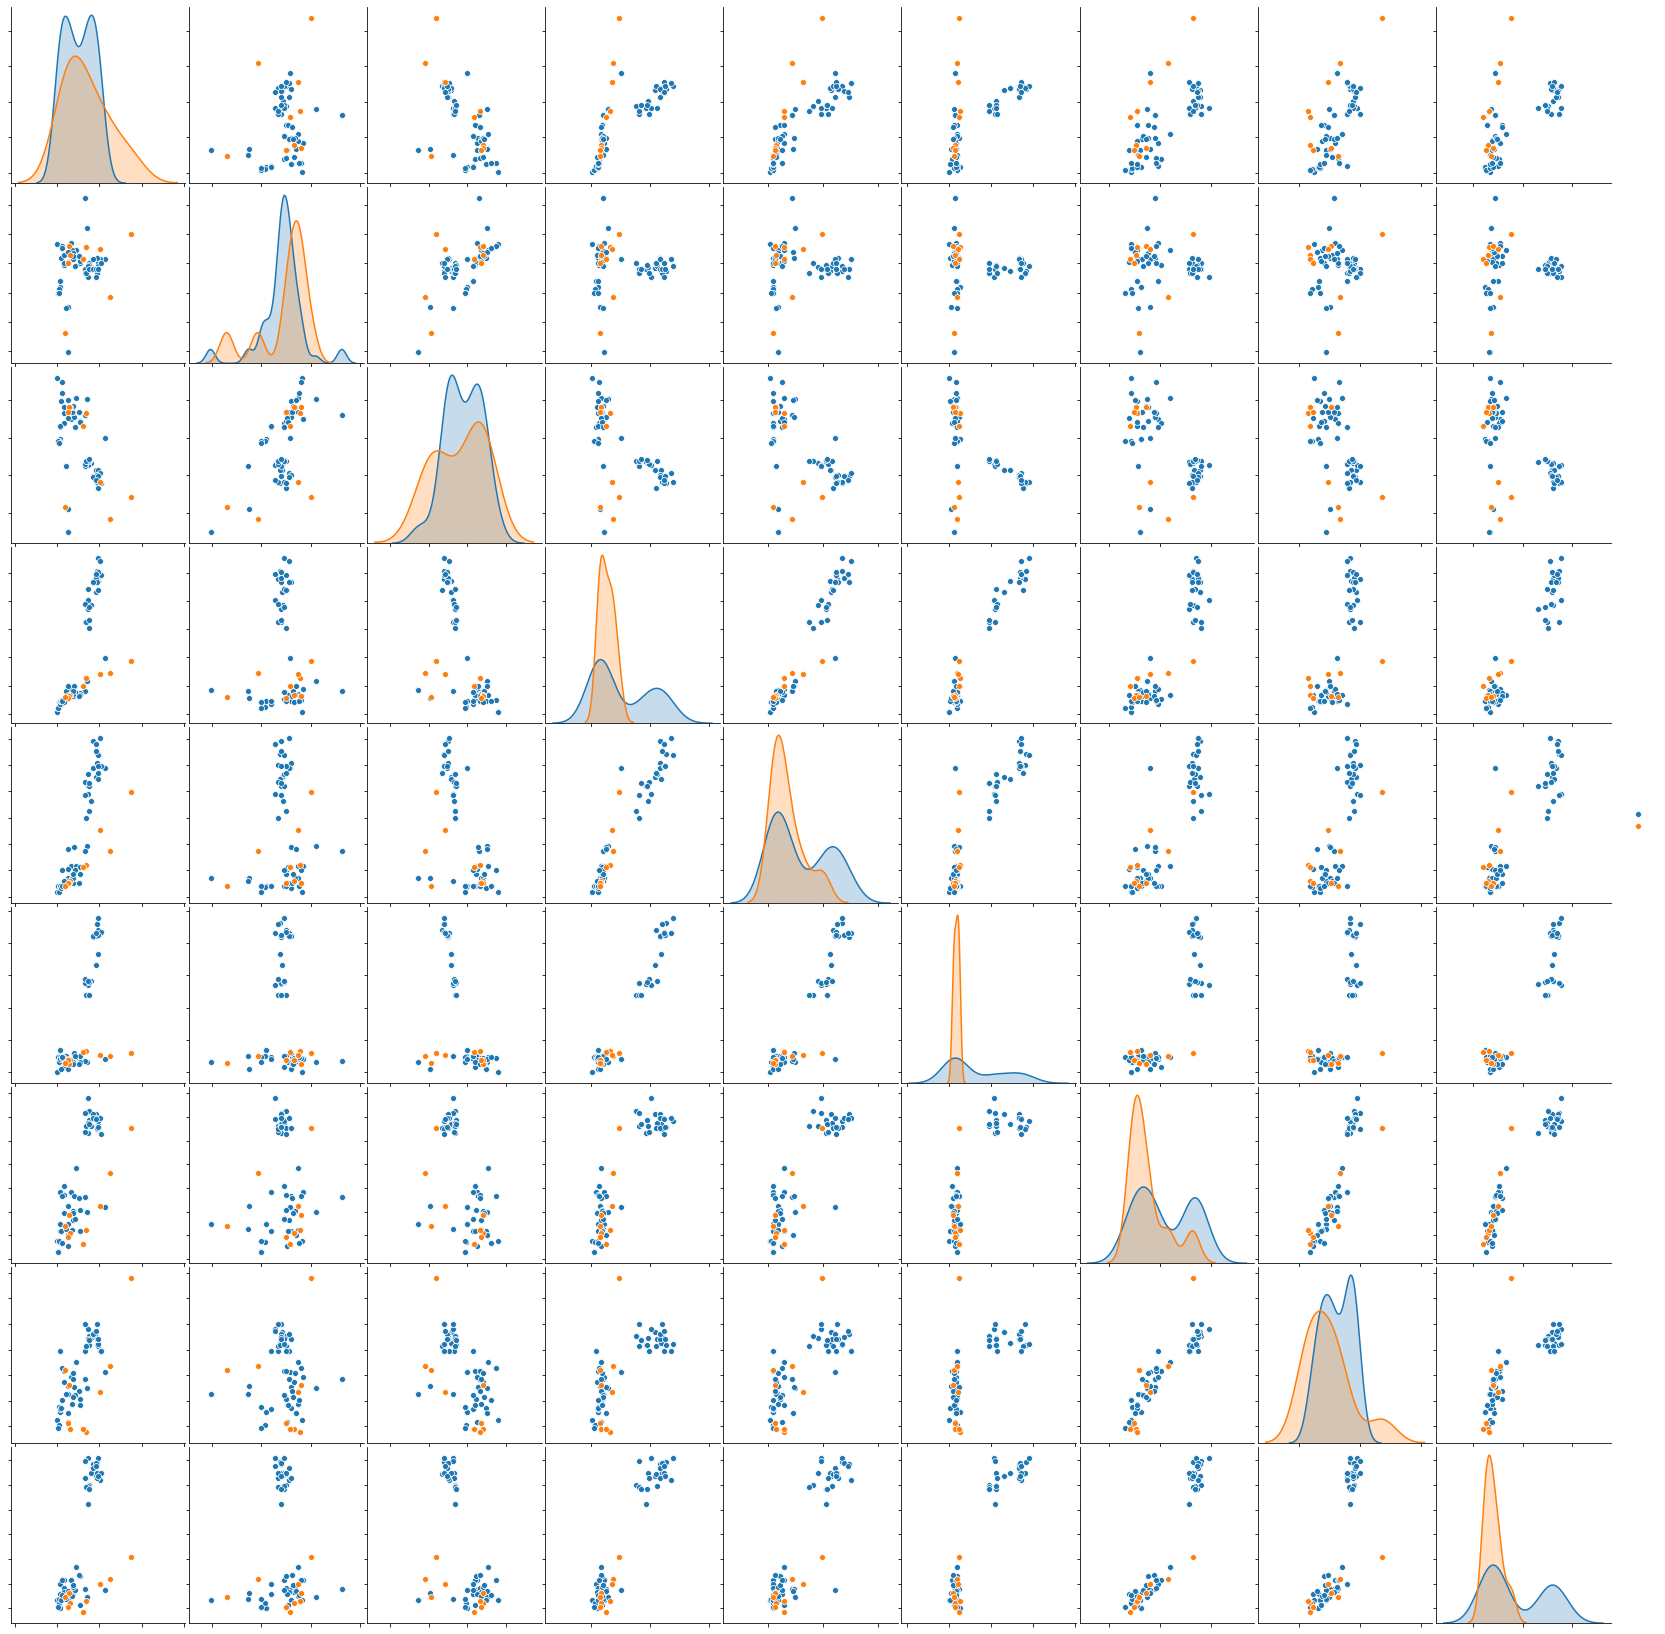

In [294]:
sns.pairplot(feature_dataframe, kind='scatter', hue = 'label')

### There is no significant difference visible by looking scatter plot before and after split.

# d.iii)  Time series split (1, 20) and 5-fold cross validation

In [295]:
def split_data(parts, file):
    p = len(file)/parts
    np_arr = file.to_numpy()
    split_temp = [np_arr[round(p * i): round(p *(i+1))] for i in range(parts)]
    res = pd.DataFrame()
    for df in split_temp:
        res = pd.concat([res, pd.DataFrame(df)], sort = False, axis = 1)
    temp_lbl = [i for i in range(1, 6*parts+1)]
    res.columns = temp_lbl
    return res

def stats(df):
    row = []
    for i, col in enumerate(df.columns):
        temp = [df[col].std(), df[col].max(), df[col].mean()]
        row.extend(temp)
    #print(row)
    return row

def read_and_split(l, file, binary=True):
    final_df = pd.DataFrame()
    labels=[]
    for index, path in enumerate(file):
        file = pd.read_csv(path, delimiter=',', skiprows = 5, names=Col)
        temp_dir = path.split('/')[-2]
        label = 0 if binary else temp_dir
        if 'bending' in temp_dir:
            label = 1 if binary else temp_dir
        df = split_data(l,file)
        temp = []
        stat_row = stats(df)
        temp.append(stat_row)
        labels.append(label)
        final_df = final_df.append(pd.DataFrame(temp))
    return final_df,labels

## d.iii) continue....

## Splitting data and refit model and do cross validation and keeping track of best features for each split.

In [296]:

tmp_lbl = [i for i in range(1, 37)]
split_score_track = {}
for l in range(1,21):
    final_df, labels = read_and_split(l, train_files)
    logreg = LogisticRegression(C=1000000000, solver='lbfgs')
    rfecv = RFECV(logreg, cv=5)
    np_arr = final_df.to_numpy()
    selector = rfecv.fit(np_arr, labels)
    split_score_track[l] = [selector.support_, sum(selector.support_), max(selector.grid_scores_), selector.score(np_arr, labels)]




## Best (l,p) pair

In [297]:
list_score = [split_score_track[x][2] for x in range(1, 21)]
index = np.argmax(list_score)+1

##BEST (l,p)
(index, split_score_track[index][1])



(2, 4)

### Wrong Way - Do cross validation after selecting features

### Right Way - keep track of (l,p) simultaneously by doing cross-validation

# d.iv)

In [298]:
best_feature = [i for i, val in enumerate(split_score_track[int(index)][0]) if val]
best_l = index

final_df, labels_train = read_and_split(int(best_l), train_files)
train_df = final_df[best_feature]
logreg = LogisticRegression(C=1000000000, solver='lbfgs')
np_arr_train = train_df.to_numpy()
selector = logreg.fit(np_arr_train, labels)
y_pred = selector.predict(np_arr_train)


## Confusion Matrix

In [299]:
confusion_matrix(labels_train, y_pred)

array([[60,  0],
       [ 0,  9]])

In [300]:
y_prob = selector.predict_proba(np_arr_train)
y_class_prob = [x[1] for x in y_prob]


## ROC curve

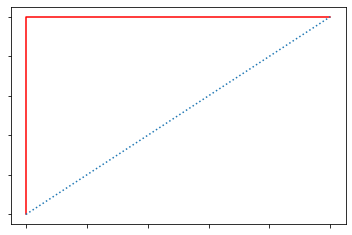

In [301]:
fpr, tpr, threshold = roc_curve(labels_train, y_class_prob)
area = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')

## p-values and beta- coefficients

In [302]:
logit = Logit(labels, np_arr_train)
print(logit.fit(method = 'lbfgs').summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                   1.000
Time:                        23:54:18   Log-Likelihood:            -0.00013764
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.481e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -15.9868   3513.284     -0.005      0.996   -6901.897    6869.923
x2            15.8700   2475.198      0.006      0.995   -4835.429    4867.169
x3            11.0576   2635.022      0.004      0.9

# Fitting Test data on classifier for same features and split

In [303]:
best_feature = [i for i, val in enumerate(split_score_track[int(index)][0]) if val]
best_l = index
final_df, labels_test = read_and_split(int(best_l), test_files)
test_df = final_df[best_feature]
np_arr_test = test_df.to_numpy()
selector.score(np_arr_test, labels_test)


0.9473684210526315

### Observation: Test accuracy is lower than cross-validation accuracy

# d.vi) Classes seems to be well seperated. Also shown by summary above that classes are completely seperable

# d.vii) From confusion matrix, clearly classes are imbalance.


## d.vii) Case-controlling sampling

In [304]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(np_arr_train, labels_train)
logreg = LogisticRegression(solver='lbfgs')
model = logreg.fit(x_train, y_train)
model.score(x_train, y_train)
y_pred = model.predict(x_train)
model.score(np_arr_test, labels_test)
#len([i for i, val in enumerate(y_train) if val ])

1.0

## d.vii) confusion-matrix

In [305]:
confusion_matrix(y_train, y_pred)

array([[60,  0],
       [ 0, 60]])

## d.vii) ROC curve

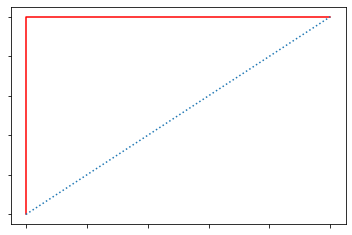

In [306]:
y_prob = selector.predict_proba(x_train)
y_class_prob = [x[1] for x in y_prob]

fpr, tpr, threshold = roc_curve(y_train, y_class_prob)
area = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')

# e.i) Repeat d.iii with L1 penalized Logistic Regression

In [307]:
lambda_track={}
for l in range(1,21):
    final_df, labels_tr = read_and_split(l, train_files)
    logit = LogisticRegressionCV(cv = 5, penalty = 'l1', solver = 'liblinear', max_iter = 1000, Cs=np.logspace(-3, 3, 7))
    np_arr_tr = final_df.to_numpy()
    logit.fit(np_arr_tr, labels_tr)
    lambda_track[l] = [logit.C_[0], logit.score(np_arr_tr, labels_tr)]
lambda_track


{1: [0.1, 0.9710144927536232],
 2: [1000.0, 1.0],
 3: [10.0, 1.0],
 4: [10.0, 1.0],
 5: [1.0, 1.0],
 6: [0.1, 0.9565217391304348],
 7: [10.0, 1.0],
 8: [10.0, 1.0],
 9: [1.0, 1.0],
 10: [1.0, 1.0],
 11: [0.1, 0.9855072463768116],
 12: [1.0, 1.0],
 13: [0.1, 0.9855072463768116],
 14: [0.1, 0.9855072463768116],
 15: [10.0, 1.0],
 16: [1.0, 1.0],
 17: [0.1, 0.9855072463768116],
 18: [1.0, 1.0],
 19: [0.1, 0.9855072463768116],
 20: [0.1, 0.9855072463768116]}

### e.i) best (l, lambda)  

In [308]:
list_score = [lambda_track[x][1] for x in range(1, 21)]
#print(list_score)
best_l = np.argmax(list_score)+1
best_lambda = lambda_track[best_l][0]
##BEST (l,p)

(best_l, best_lambda)
#print(list_score)

(2, 1000.0)

# e.ii) Perfomance comparison by calculating test error

In [309]:
final_df, labels_tr = read_and_split(int(best_l),train_files)
logit = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear', max_iter = 1000, Cs=[best_lambda])
np_arr_tr = final_df.to_numpy()
logit.fit(np_arr_tr, labels_tr)
final_df,labels_test=read_and_split(int(best_l),test_files)
np_arr_test = final_df.to_numpy()
logit.score(np_arr_test, labels_test)

0.9473684210526315

### L1 penalized regularized model worked better for me and it is easier to implement

# f.i) Multi Class classification

In [310]:
lambda_track={}
for l in range(1,21):
    final_df, labels_tr = read_and_split(l, train_files, binary=False)
    logit = LogisticRegressionCV(cv = 5, penalty = 'l1', solver = 'liblinear', max_iter = 1000, Cs=np.logspace(-3, 3, 7))
    np_arr_tr = final_df.to_numpy()
    logit.fit(np_arr_tr, labels_tr)
    lambda_track[l] = [logit.C_[0], logit.score(np_arr_tr, labels_tr)]
#lambda_track
#labels_tr

### best (l, lambda) for multi-class

In [311]:
list_score = [lambda_track[x][1] for x in range(1, 21)]
index = np.argmax(list_score)+1
best_lambda = lambda_track[index][0]
print(index, best_lambda)

1 0.1


In [312]:

final_df, labels_tr = read_and_split(int(index), train_files, binary=False)
logit = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear', max_iter = 1000, Cs=[0.1])
np_arr_tr = final_df.to_numpy()
logit.fit(np_arr_tr, labels_tr)

LogisticRegressionCV(Cs=[0.1], max_iter=1000, penalty='l1', solver='liblinear')

## f.i) Test-Accuracy

In [313]:
final_df, labels_test= read_and_split(int(index), test_files, binary=False)
np_arr_test = final_df.to_numpy()
logit.score(np_arr_test, labels_test)

0.7894736842105263

### f.i) Confusion Matrix

In [314]:
confusion_matrix(labels_test, logit.predict(np_arr_test))

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 0],
       [0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 3]])

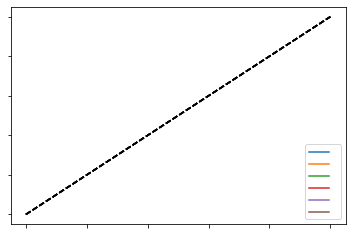

In [315]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

y = label_binarize(labels_tr, classes=[0,1,2,3,4,5])
y_test = label_binarize(labels_test, classes=[0,1,2,3,4,5])
classifier_temp = OneVsRestClassifier(LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=best_lambda, max_iter=300))
y_score = classifier_temp.fit(np_arr_tr, y).decision_function(np_arr_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(6):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:0.2f}) class {}'.format(roc_auc[i], i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")



# classifier = OneVsRestClassifier(LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear")).fit(np_arr_train, labels_tr)
# score = classifier.decision_function(np_arr_test)
# y_pred = classifier.predict(np_arr_test)

# f.ii) Naive-bayes classifier with Gaussian

In [269]:
cv_score = []
for l in range(1, 21):
    train_df, labels = read_and_split(l, train_files, binary=False)
    gaussian = GaussianNB()
    cv_score.append(np.mean(cross_val_score(gaussian, train_df.to_numpy(), labels, cv=5)))
best_l = np.argmax(cv_score)+1
print(best_l)

1


# Test-error with Gaussian

In [270]:
train_df, labels = read_and_split(int(best_l), train_files, binary=False)
gaussian = GaussianNB()
gaussian.fit(train_df, labels)
test_df, labels_test = read_and_split(int(best_l), test_files, binary=False)
gaussian.score(test_df, labels_test)

0.8947368421052632

# f.ii) Naive-bayes classifier with Multinomial

In [271]:
alpha_track = {}
for l in range(1, 21):
    train_df, labels = read_and_split(int(l), train_files, binary=False)
    multi = MultinomialNB()
    multi_cv_grid = GridSearchCV(estimator=mnb,param_grid={"alpha":np.logspace(-2, 2, 100)},cv=5, iid=False)
    multi_cv_grid.fit(train_df, labels)
    alpha_track[l] = [multi_cv_grid.best_score_, multi_cv_grid.best_params_]
alpha_track

{1: [0.8263736263736263, {'alpha': 0.01}],
 2: [0.856043956043956, {'alpha': 0.01}],
 3: [0.8703296703296702, {'alpha': 0.01}],
 4: [0.8857142857142858, {'alpha': 0.5462277217684343}],
 5: [0.8857142857142858, {'alpha': 0.34304692863149194}],
 6: [0.8857142857142858, {'alpha': 0.044306214575838825}],
 7: [0.8846153846153847, {'alpha': 0.19630406500402714}],
 8: [0.8417582417582418, {'alpha': 0.23644894126454083}],
 9: [0.8571428571428571, {'alpha': 0.41320124001153385}],
 10: [0.8417582417582418, {'alpha': 0.2848035868435802}],
 11: [0.8703296703296702, {'alpha': 0.01}],
 12: [0.8571428571428573, {'alpha': 0.1484968262254465}],
 13: [0.8714285714285716, {'alpha': 0.07054802310718646}],
 14: [0.8417582417582418, {'alpha': 0.01}],
 15: [0.8274725274725275, {'alpha': 0.01}],
 16: [0.856043956043956, {'alpha': 0.23644894126454083}],
 17: [0.8428571428571429, {'alpha': 0.01}],
 18: [0.8274725274725275, {'alpha': 0.01}],
 19: [0.8120879120879121, {'alpha': 0.01}],
 20: [0.8131868131868132, {

In [272]:
list_score = [alpha_track[x][0] for x in range(1, 21)]
index = np.argmax(list_score)+1
print(index, alpha_track[index][1]['alpha'])

4 0.5462277217684343


# Test-error with Multinomial

In [273]:
train_df, labels = read_and_split(int(index), train_files, binary=False)
multi = MultinomialNB(alpha = alpha_track[index][1]['alpha'])
multi.fit(train_df, labels)
test_df, labels_test = read_and_split(int(index), test_files, binary=False)
multi.score(test_df, labels_test)

0.8421052631578947

# f.iii) Gaussian performs better than Multinomial in this case

# ISLR Answers

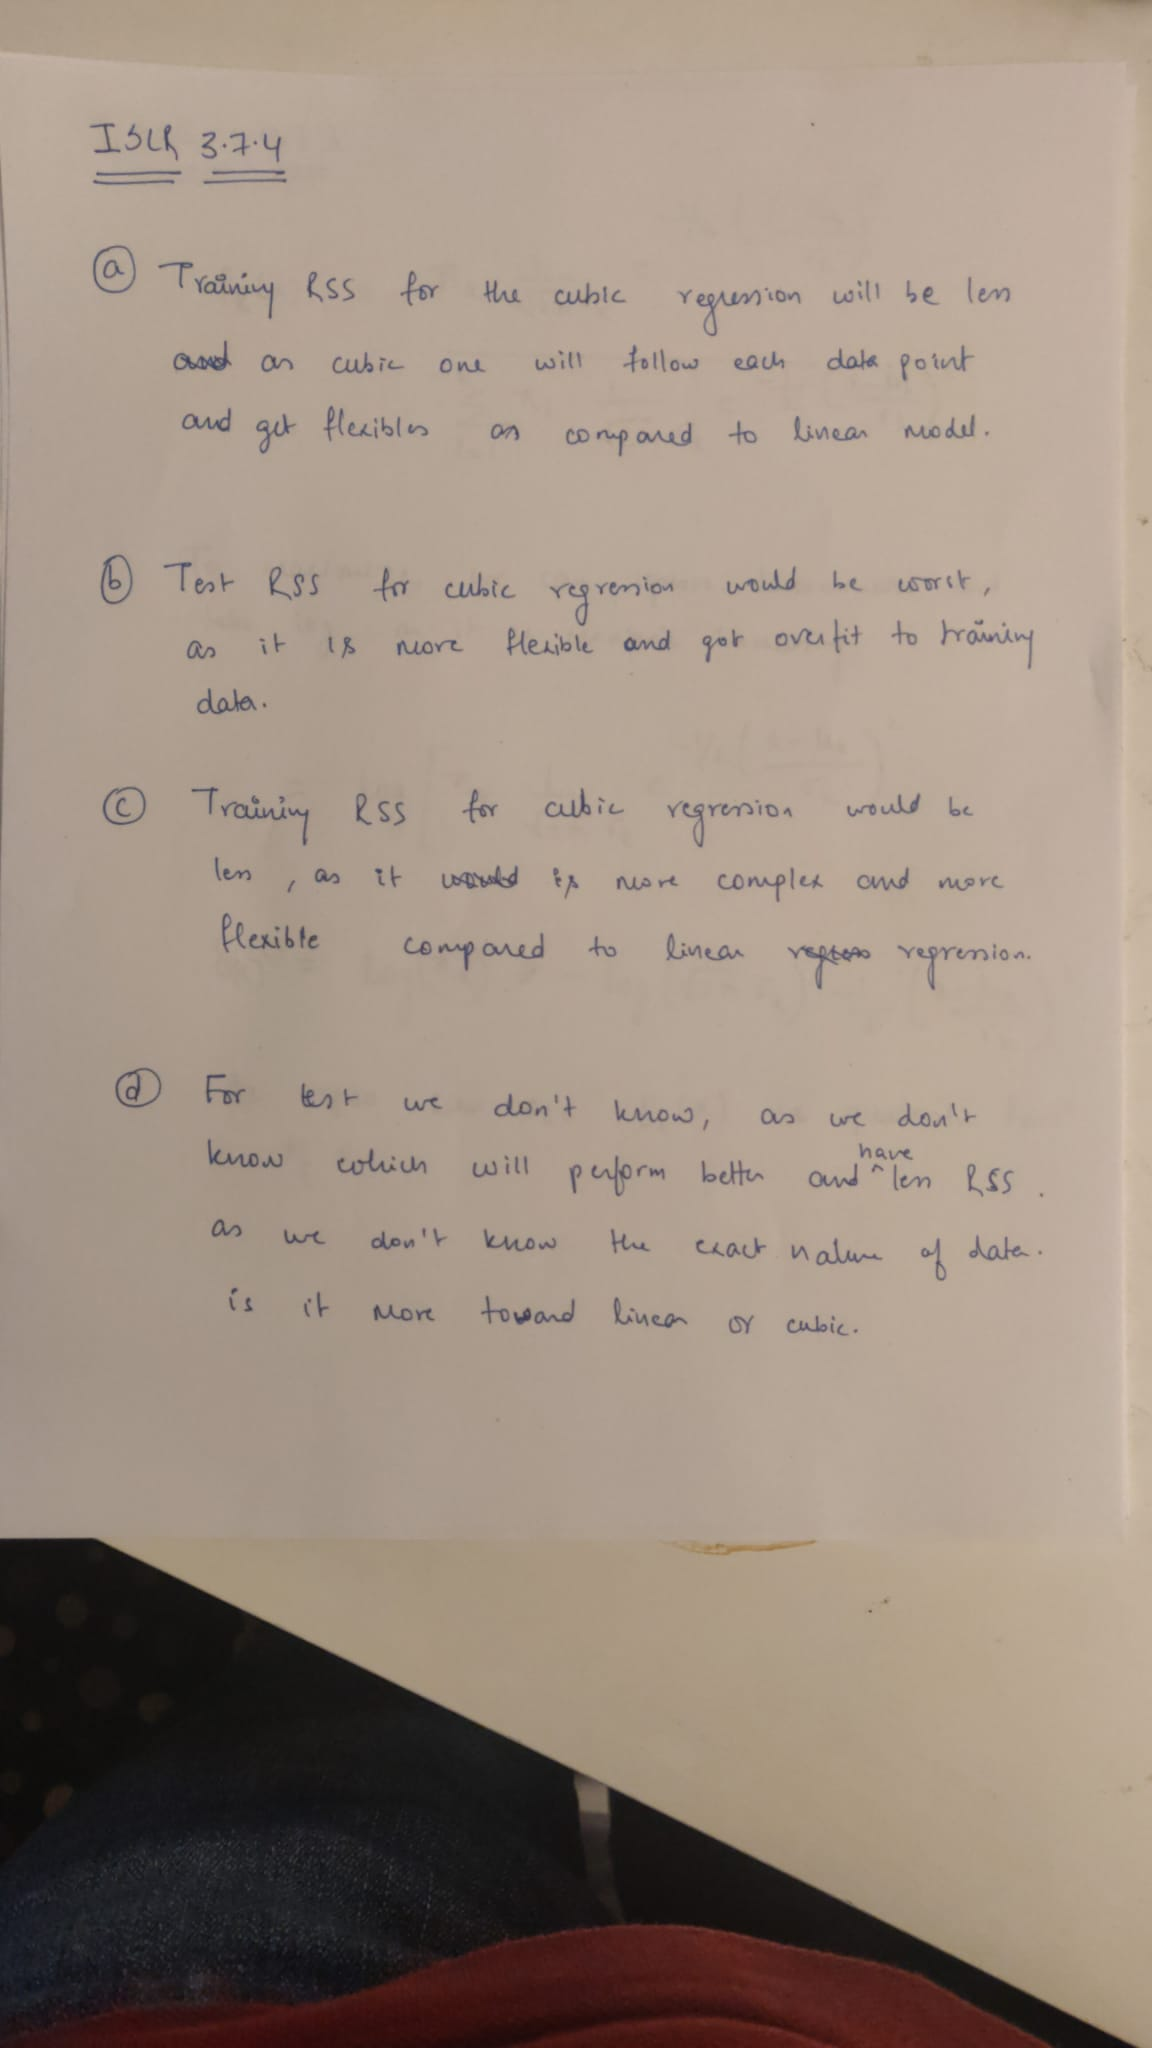

In [274]:
from IPython.display import Image
Image('./ISLR 3.7.4.jpeg')

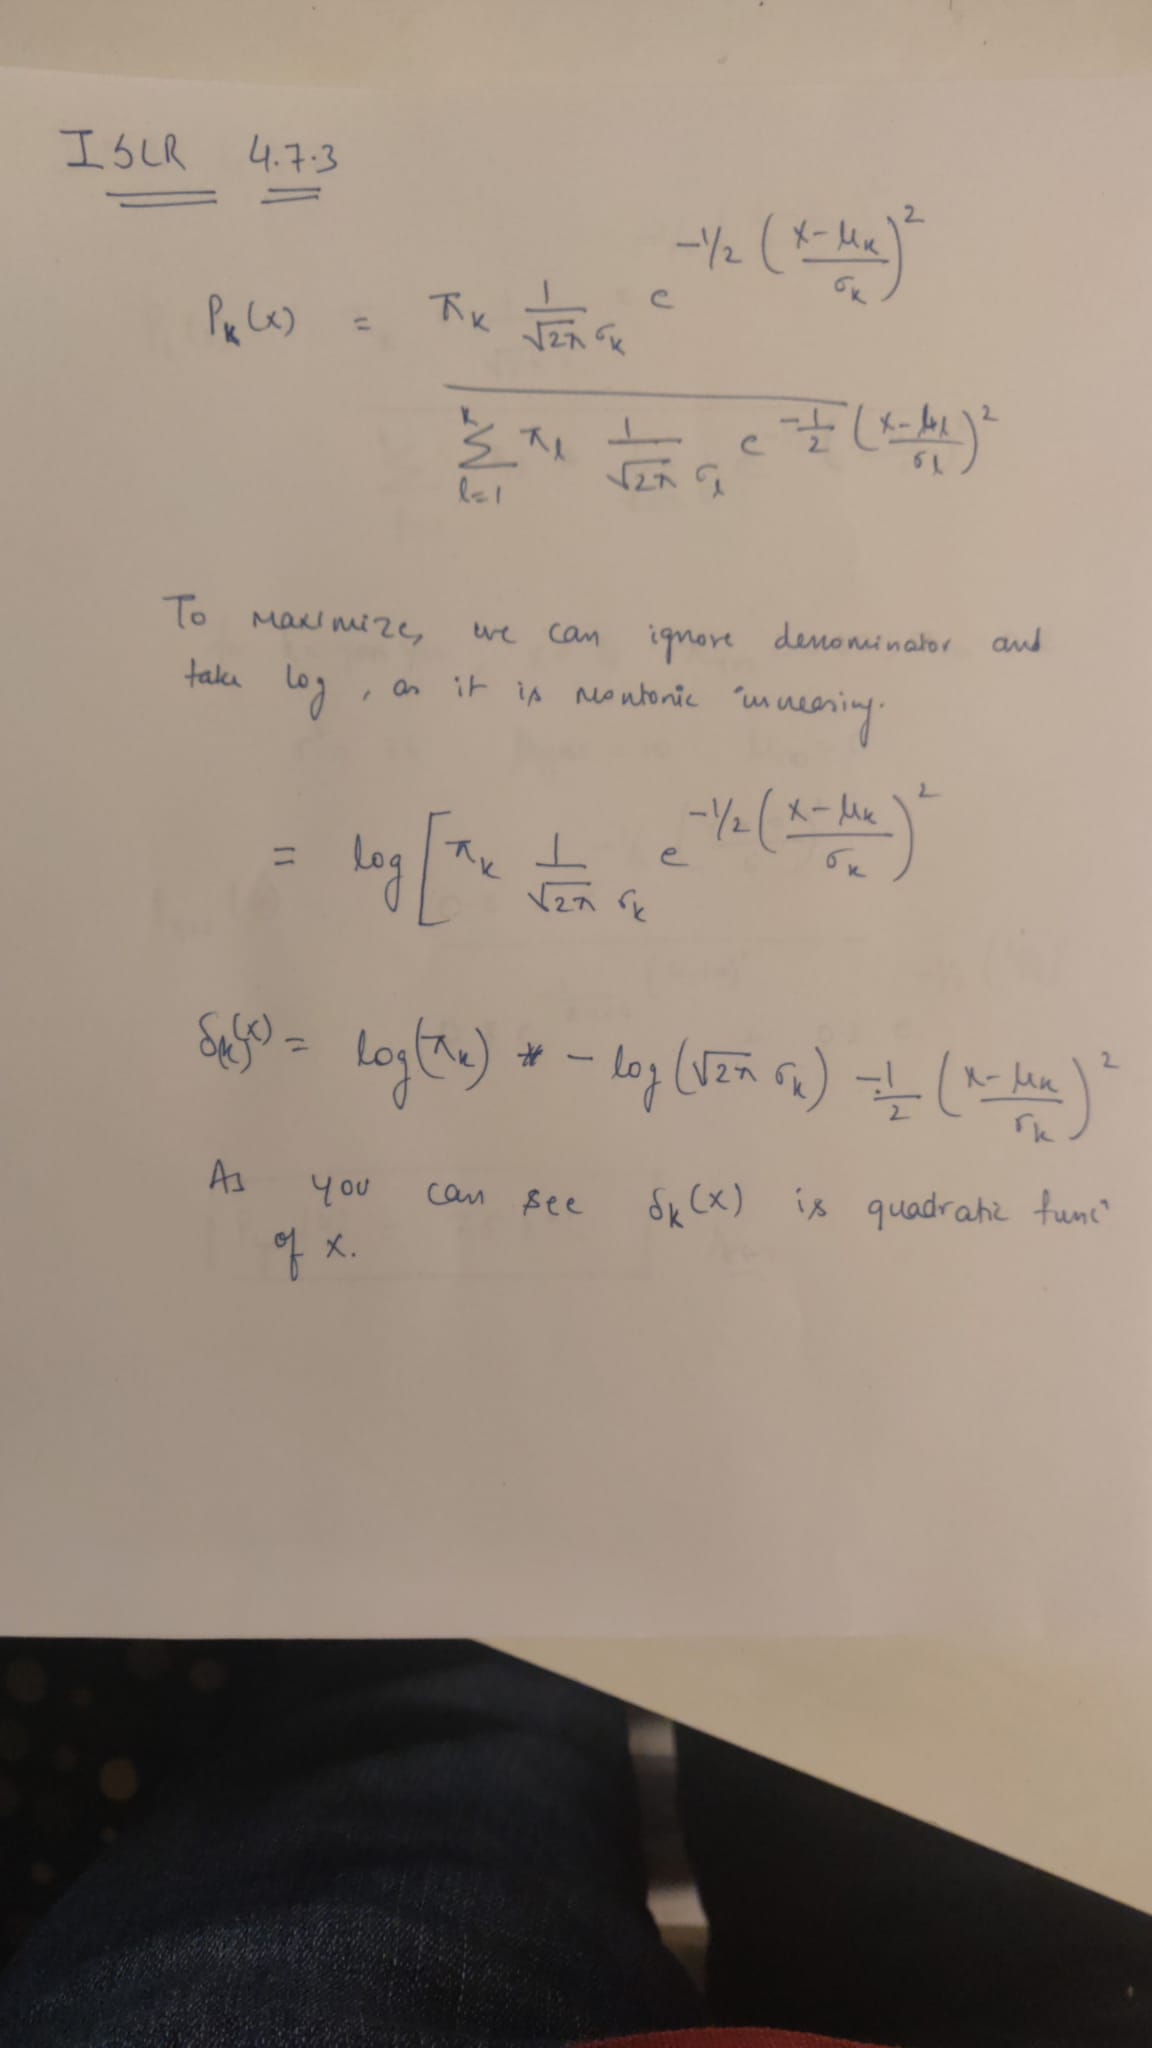

In [275]:
Image('ISLR 4.7.3.jpeg')

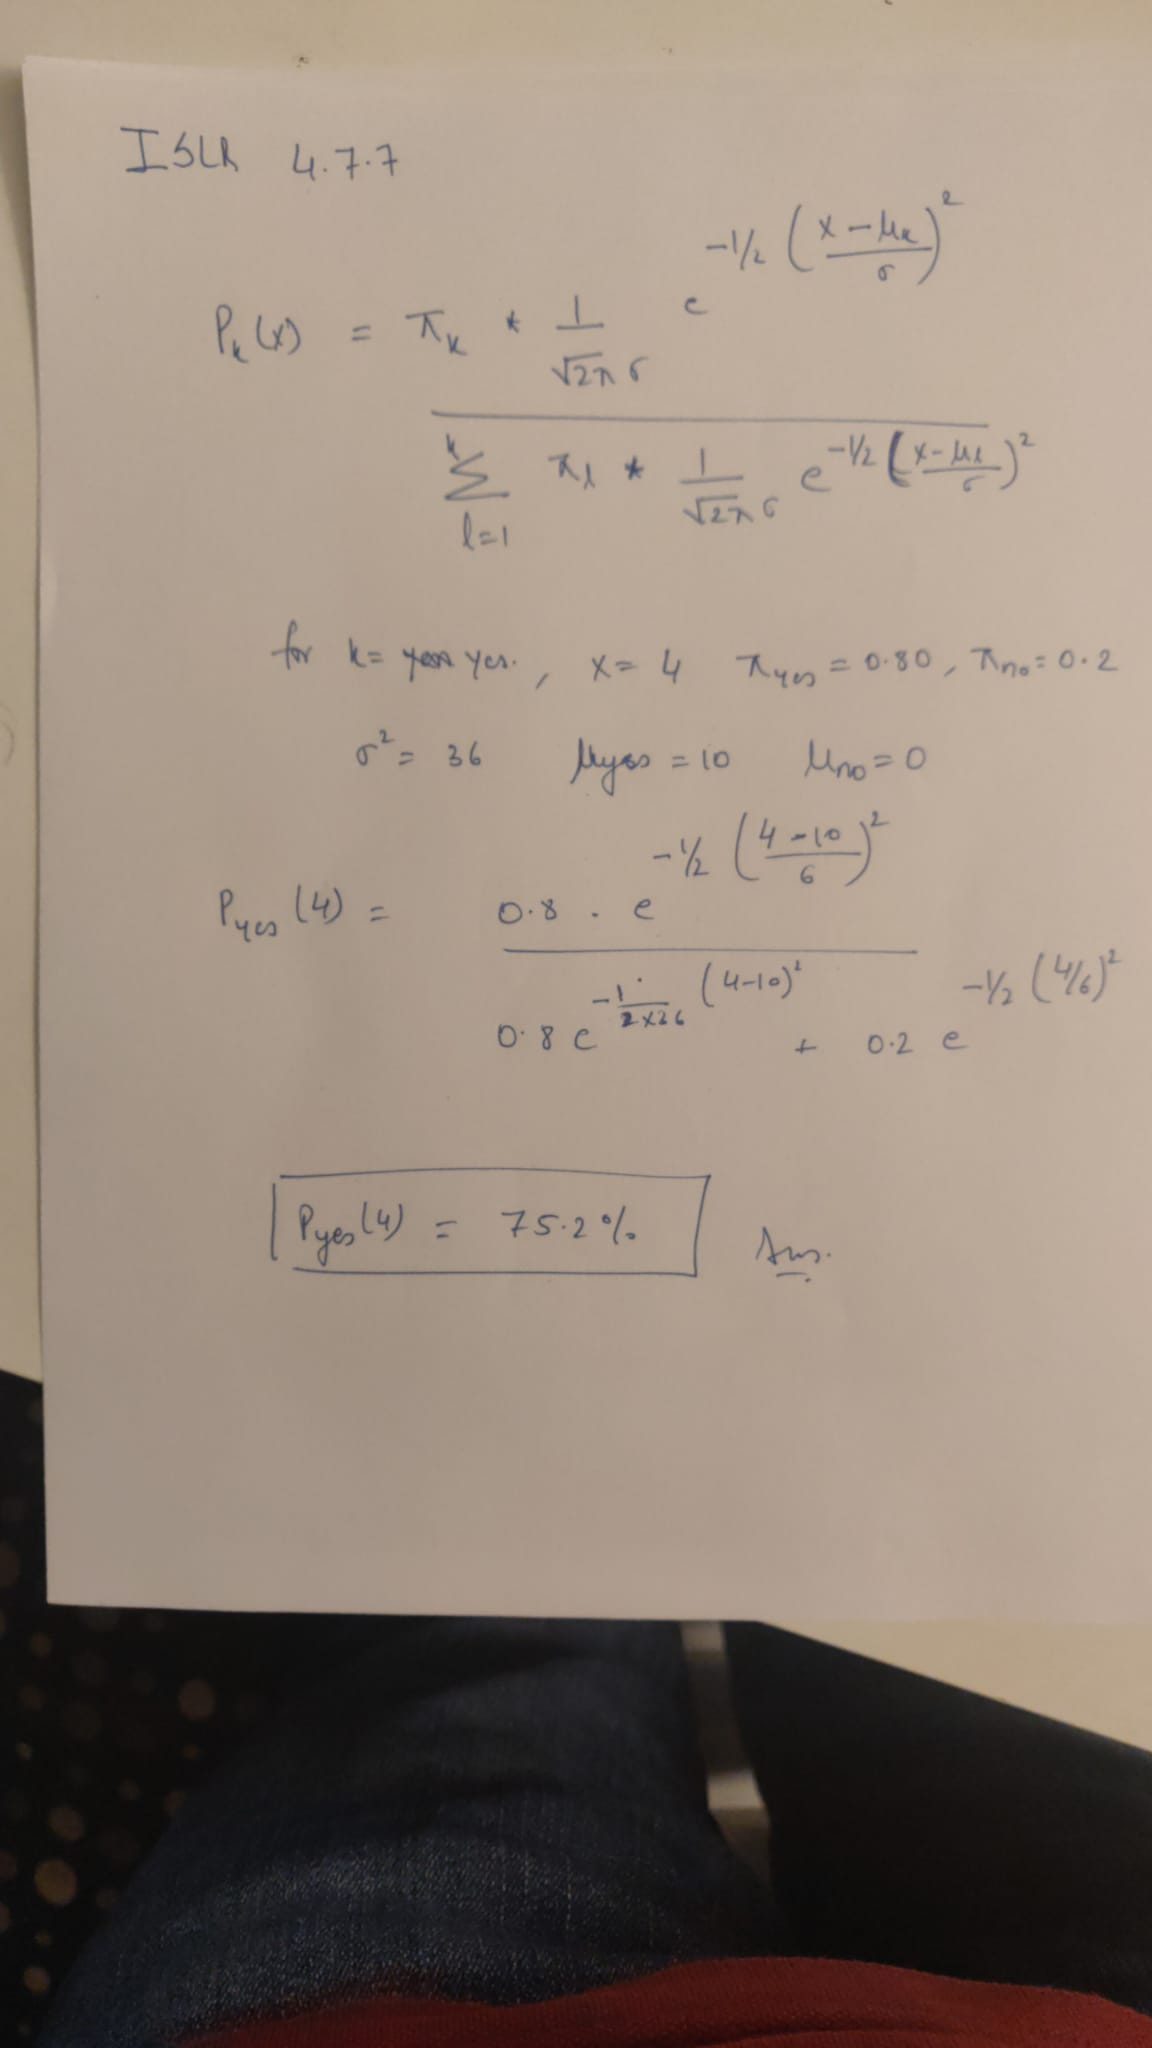

In [276]:
Image('ISLR 4.7.7.jpeg')